In [164]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [165]:
data=pd.read_csv("Bank Customer Churn Prediction.csv")
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [167]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [168]:
data=data.drop_duplicates()

In [169]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [170]:
data.shape

(10000, 12)

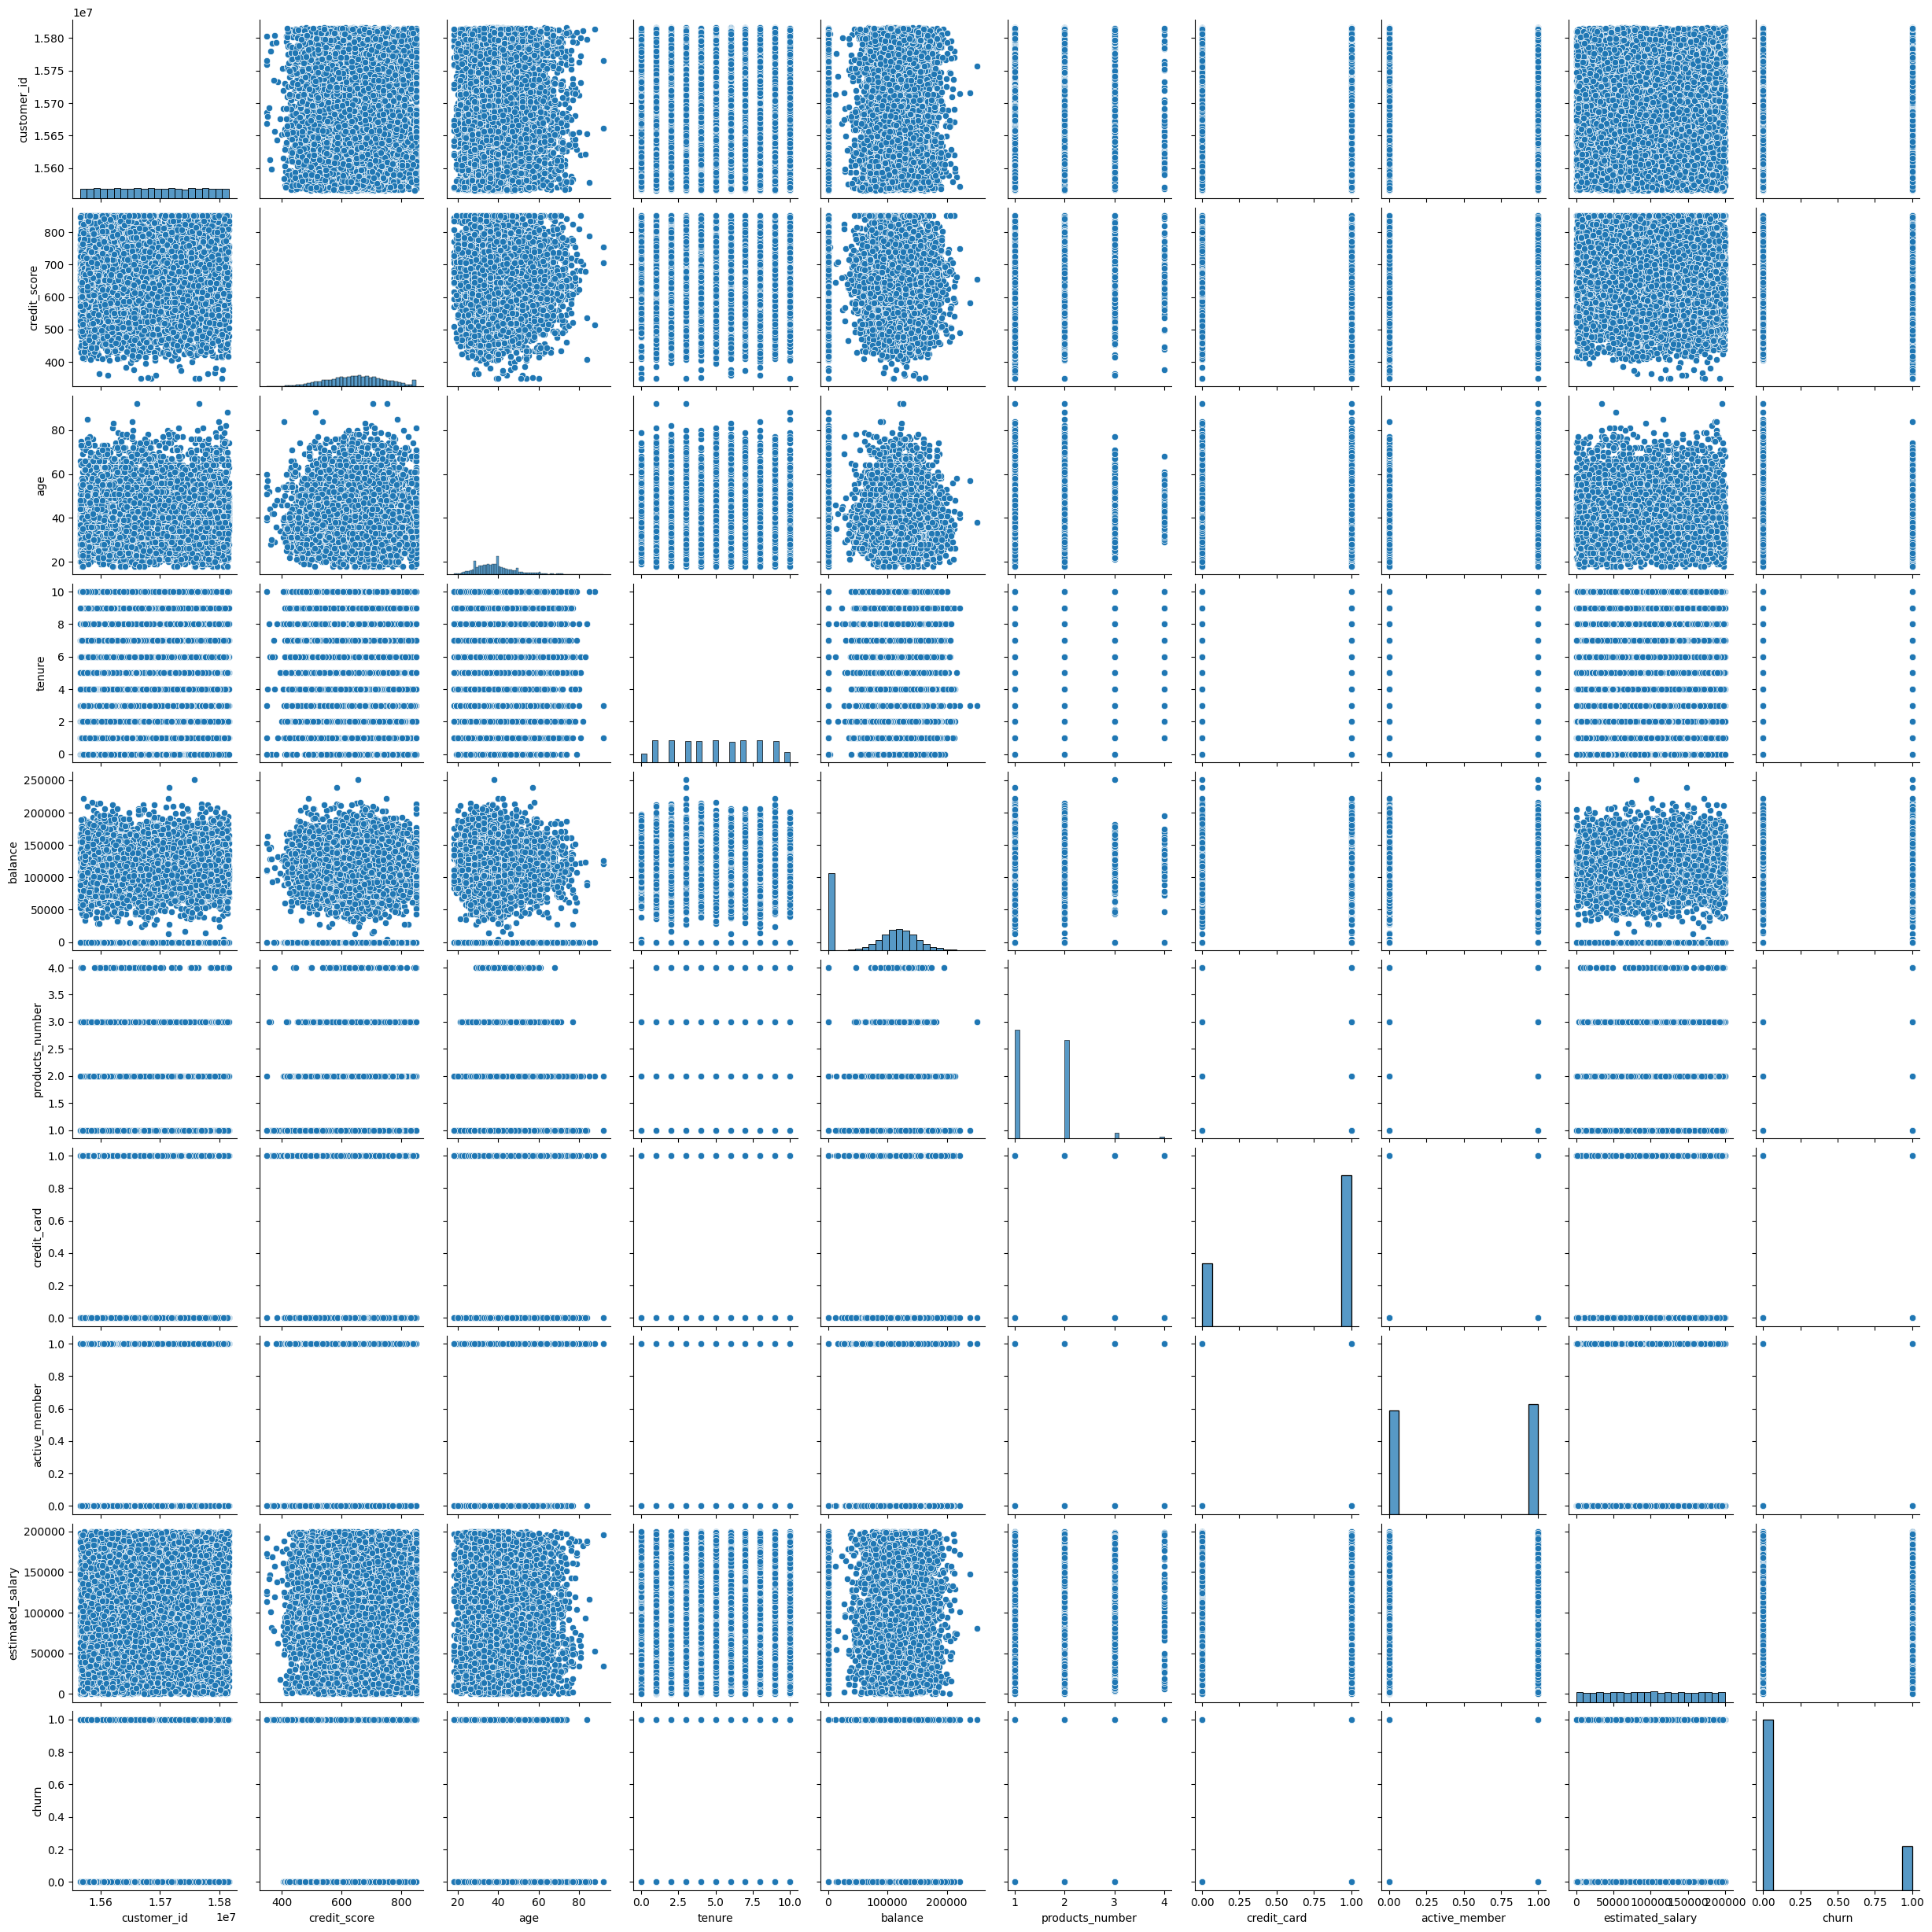

In [171]:
#Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.
sns.pairplot(data)

<Axes: xlabel='churn'>

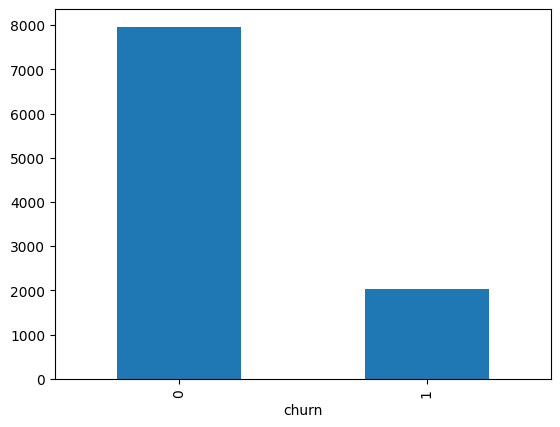

In [172]:
data['churn'].value_counts().plot(kind='bar')

In [173]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [174]:
data=data.drop(columns='customer_id',axis=1)

In [175]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


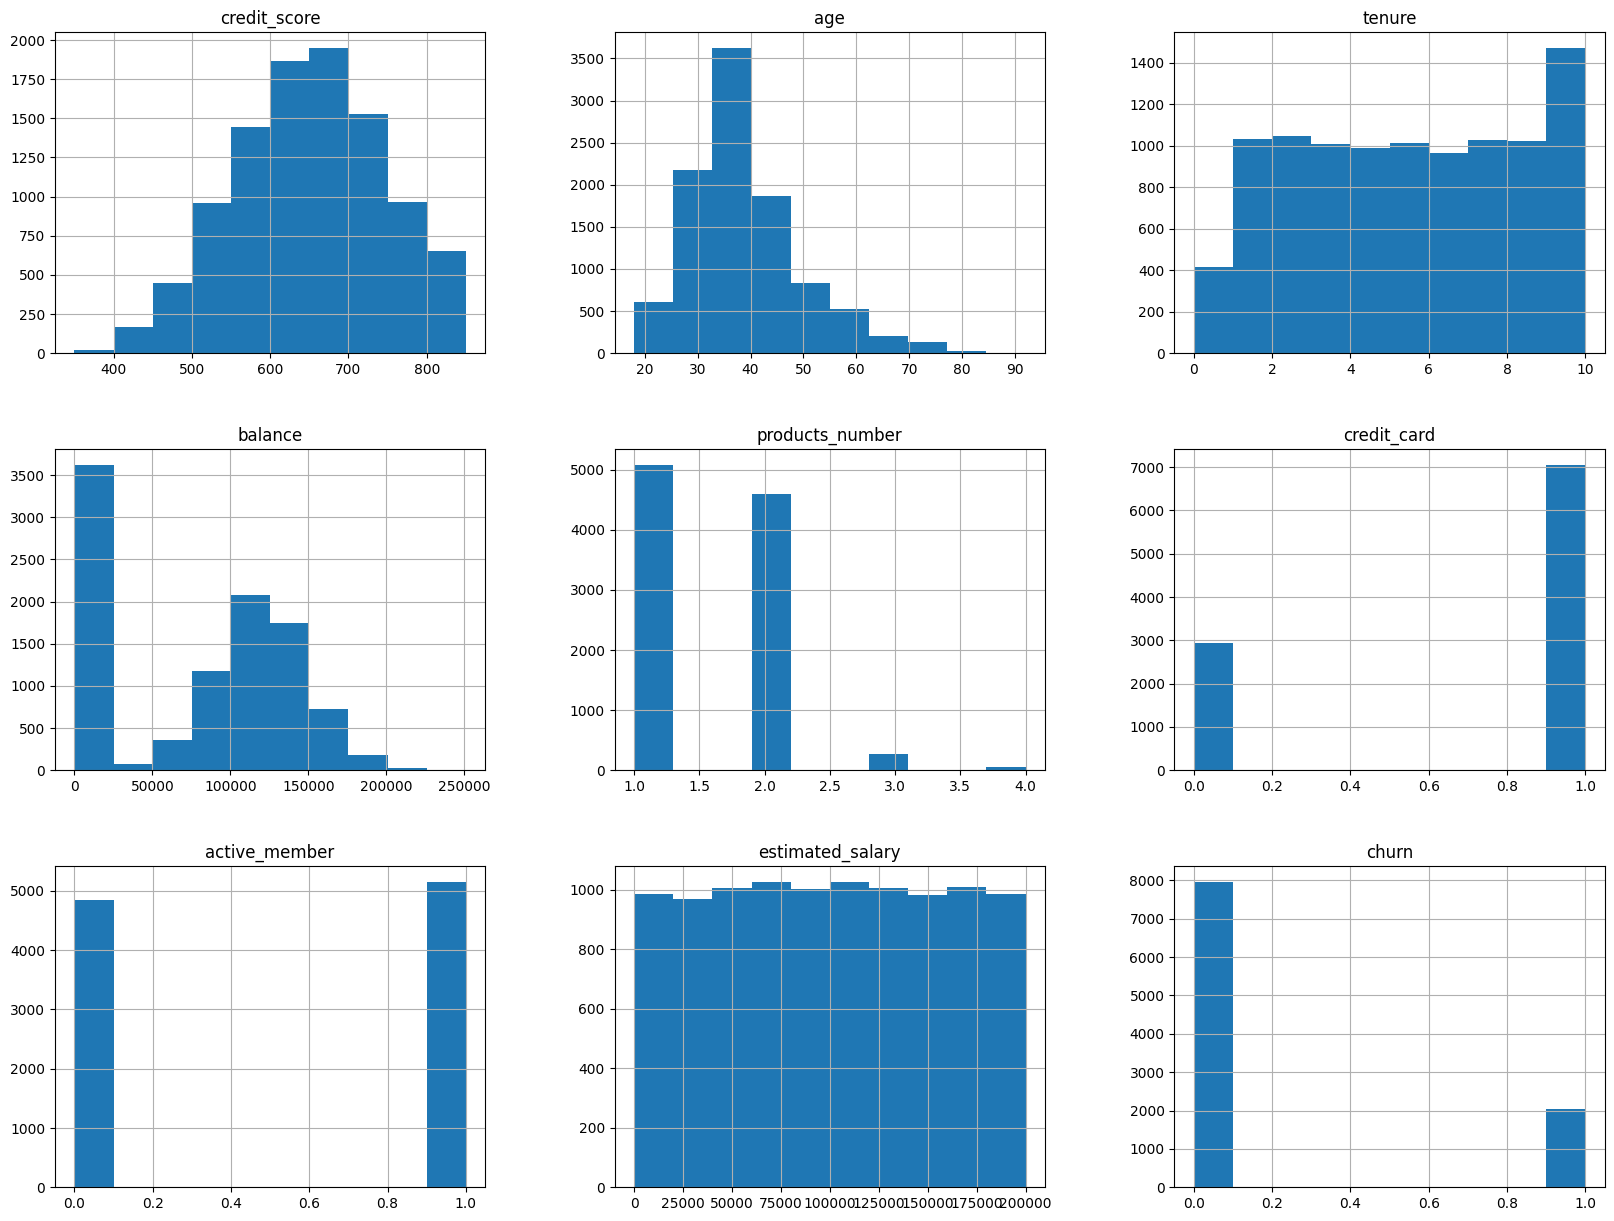

In [176]:
data.hist(bins=10,figsize=(20,15))
plt.show()

<Axes: xlabel='age', ylabel='Count'>

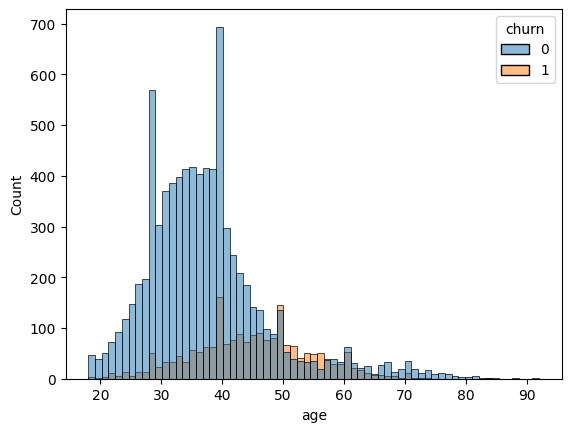

In [177]:
sns.histplot(data,x='age',hue='churn')

<Axes: xlabel='estimated_salary', ylabel='credit_score'>

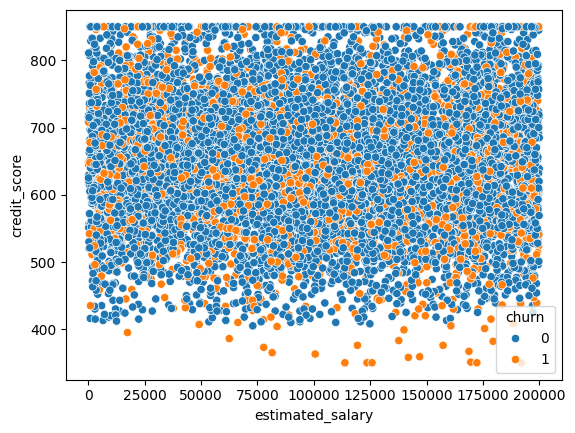

In [178]:
sns.scatterplot(data,y='credit_score',x='estimated_salary',hue='churn')
#people with less than 400 credit_score are churn

<Axes: xlabel='estimated_salary', ylabel='age'>

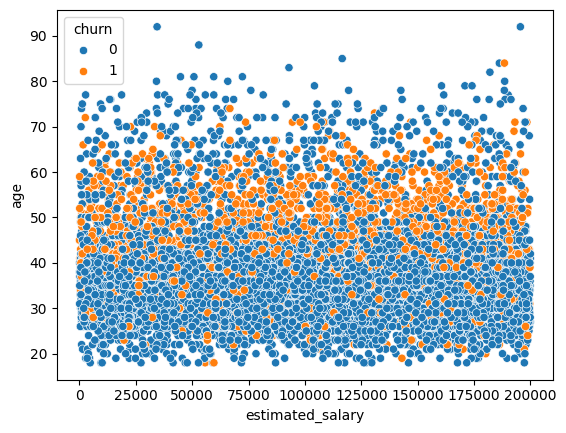

In [179]:
sns.scatterplot(data,x='estimated_salary',y='age',hue='churn')
#people of age btw 40-60 likely to be churn

In [180]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['country']=le.fit_transform(data['country'])
data['gender']=le.fit_transform(data['gender'])


In [181]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [182]:
x=data.drop('churn',axis=1)
y=data.churn

In [183]:
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [184]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [185]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [186]:
from imblearn.over_sampling import SMOTE

In [187]:
#dataargumentation using sysnthetic minority oversampling technique
x_arg,y_arg=SMOTE().fit_resample(x,y)

In [188]:
y_arg.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_arg,y_arg,test_size=0.2,random_state=42)

In [190]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [191]:
y_pred=rfc.predict(x_test)

In [192]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [193]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [194]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[1390  243]
 [ 202 1351]]


86.03264281230383

queries


In [195]:
people_attracted=(y_pred.sum()/len(y_pred))*100
print("people attracted to source data:",people_attracted)

people attracted to source data: 50.03138731952291


In [210]:
data_og=pd.read_csv('Bank Customer Churn Prediction.csv')
data_og


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [197]:
data.describe().loc[['mean']]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
mean,650.5288,0.7463,0.5457,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881,0.2037


In [214]:
attracted_clients=data_og['churn']==1
duration=data['tenure']
total=attracted_clients+duration
avg_call=total.mean()
print(avg_call)
#avg call duration

5.2165


In [213]:
male_age=data_og[data_og['gender'] == 'Male']['age'].mean()
female_age=data_og[data_og['gender'] == 'Female']['age'].mean()
print(male_age)
print(female_age)

38.658237126626354
39.238388729914156
